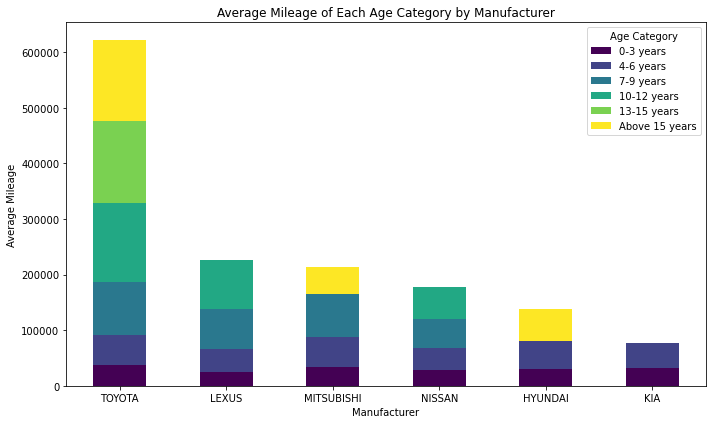

In [27]:
# 4_3 Mileage Distribution by Make and Age #####

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]

# csv_url = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\test vehicle.csv'
# df = pd.read_csv(csv_url)

df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']
# Define a function to check if the value is less than 8 and return 1, otherwise 0
def assign_value_less_80(x):
    return 1 if x > 8 else 0
df['boh_below_80'] = df['age'].apply(assign_value_less_80)
def assign_value_80_90(x):
    return 1 if 5 <= x <= 8 else 0
df['boh_80-90'] = df['age'].apply(assign_value_80_90)
def assign_value_above_90(x):
    return 1 if x < 5 else 0
df['boh_above_90'] = df['age'].apply(assign_value_above_90)
# Calculate the counts of each string in the column
string_counts = df['model'].value_counts()
df['model_count'] = df['model'].map(string_counts)
ma_count = df['make'].value_counts()
df['make_count'] = df['make'].map(ma_count)
columns_to_drop = [0,1,3,4,5,7,10]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)


# Function to map age to categories
def categorize_age(age):
    if age <= 3:
        return 1
    elif age <= 6:
        return 2
    elif age <= 9:
        return 3
    elif age <= 12:
        return 4
    elif age <= 15:
        return 5
    else:
        return 6

# Apply the categorize_age function to create the new column
df['age_category'] = df['age'].apply(categorize_age)

# Manually enter top 10 models as it is mentioned in the data
top_ten_models = ['PRIUS', 'YARIS', 'AURIS', 'OUTLANDER', 'C-HR', 'LEAF', 'CT', 'RAV4', 'IONIQ', 'NIRO']

# Filter the DataFrame to include only rows with 'column_name' matching the strings in 'strings_to_filter'
filtered_df = df[df['model'].isin(top_ten_models)]

# Calculate the average mileage for each age category of each manufacturer
grouped_df = filtered_df.groupby(['make', 'age_category'])['test_mileage'].mean().reset_index()

# Pivot the data to have age categories as columns
pivoted_df = grouped_df.pivot(index='make', columns='age_category', values='test_mileage')

# Sort the DataFrame based on total mileage for each manufacturer
pivoted_df['total_mileage'] = pivoted_df.sum(axis=1)
pivoted_df = pivoted_df.sort_values(by='total_mileage', ascending=False)

# Select the top 10 manufacturers for the plot
top_10_manufacturers = pivoted_df.head(10).index

# Filter the DataFrame to include only the top 10 manufacturers
filtered_pivoted_df = pivoted_df.loc[top_10_manufacturers]

# Map age category numbers to age group labels
age_group_labels = {
    1: '0-3 years',
    2: '4-6 years',
    3: '7-9 years',
    4: '10-12 years',
    5: '13-15 years',
    6: 'Above 15 years'
}
filtered_pivoted_df = filtered_pivoted_df.rename(columns=age_group_labels)

# Plot the stacked bar graph
filtered_pivoted_df.drop(columns='total_mileage').plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 6))
plt.xlabel('Manufacturer')
plt.ylabel('Average Mileage')
plt.title('Average Mileage of Each Age Category by Manufacturer')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Age Category', loc='upper right')
plt.tight_layout()
plt.show()